Adım 1: Veri Yükleme ve Keşfi

İlk olarak, veri setimizi Python ortamına yükleyip genel bir keşif yapacağız.

In [17]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Veri setinin yüklenmesi
df = pd.read_csv('country_wise_latest.csv')

#Veri setinin ilk birkaç satırını görüntüleme
print("İlk 5 satır:\n", df.head())

#Bu bilgi, veri setindeki sütunların veri tiplerini ve eksik değerleri tespit etmek için önemlidir.

print("\nVeri seti bilgisi:\n")
df.info()

# Veri setindeki sütunların isimleri
print("\nSütun isimleri:\n", df.columns)
#df.columns, bir Pandas DataFrame'deki sütun isimlerini almak için kullanılır. Bu, bir DataFrame'in sütunlarının isimlerini bir Pandas Index objesi olarak döndürür.

# Temel istatistiksel özet
#df.describe() fonksiyonu, bir Pandas DataFrame'in sayısal sütunları için özet istatistikler üretir.
print("\nTemel istatistiksel özet:\n", df.describe())


İlk 5 satır:
   Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Adım 2: Veri Temizleme

Eksik ve hatalı verileri tespit edip temizleme işlemlerini gerçekleştireceğiz.

In [18]:
# Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include='number').columns

# Eksik verilerin kontrolü
print("Eksik verilerin sayısı:")
print(df[numeric_columns].isnull().sum())

# Eksik verilerin ortalama ile doldurulması
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Eksik verilerin sayısı:
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64


Adım 3: Veri Manipülasyonu

In [19]:

# Eksik değerleri doldurma
# Örneğin, 'Recovered' sütunundaki eksik değerleri 0 ile doldurabiliriz
df['Recovered'].fillna(0, inplace=True)

# Gereksiz sütunları kaldırma
# Örneğin, 'New cases' ve 'New deaths' sütunlarını kaldırabiliriz
df.drop(['New cases', 'New deaths'], axis=1, inplace=True)

# Veri manipülasyonu yapılmış veri setini gösterme
print(df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New recovered  \
0    Afghanistan      36263    1269      25198    9796             18   
1        Albania       4880     144       2745    1991             63   
2        Algeria      27973    1163      18837    7973            749   
3        Andorra        907      52        803      52              0   
4         Angola        950      41        242     667              0   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  \
0                3.50                  69.49                    5.04   
1                2.95                  56.25                    5.25   
2                4.16                  67.34                    6.17   
3                5.73                  88.53                    6.48   
4                4.32                  25.47                   16.94   

   Confirmed last week  1 week change  1 week % increase  \
0                35526            737               2.07   
1       

/var/folders/rz/6630cr9x2r5b9cynx4024dgc0000gn/T/ipykernel_48612/747162446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Recovered'].fillna(0, inplace=True)


Adım 4: Veri Görselleştirme
Analiz sonuçlarını grafik ve çizelgelerle görselleştirelim.

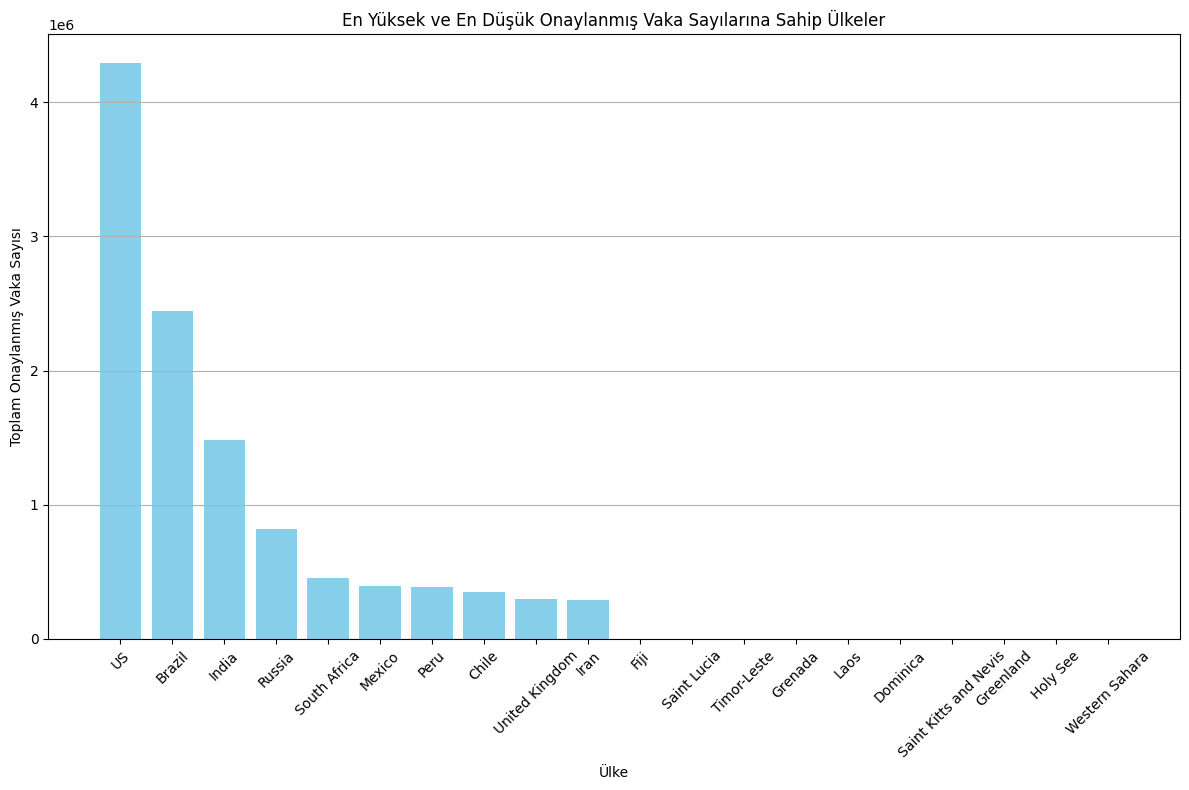

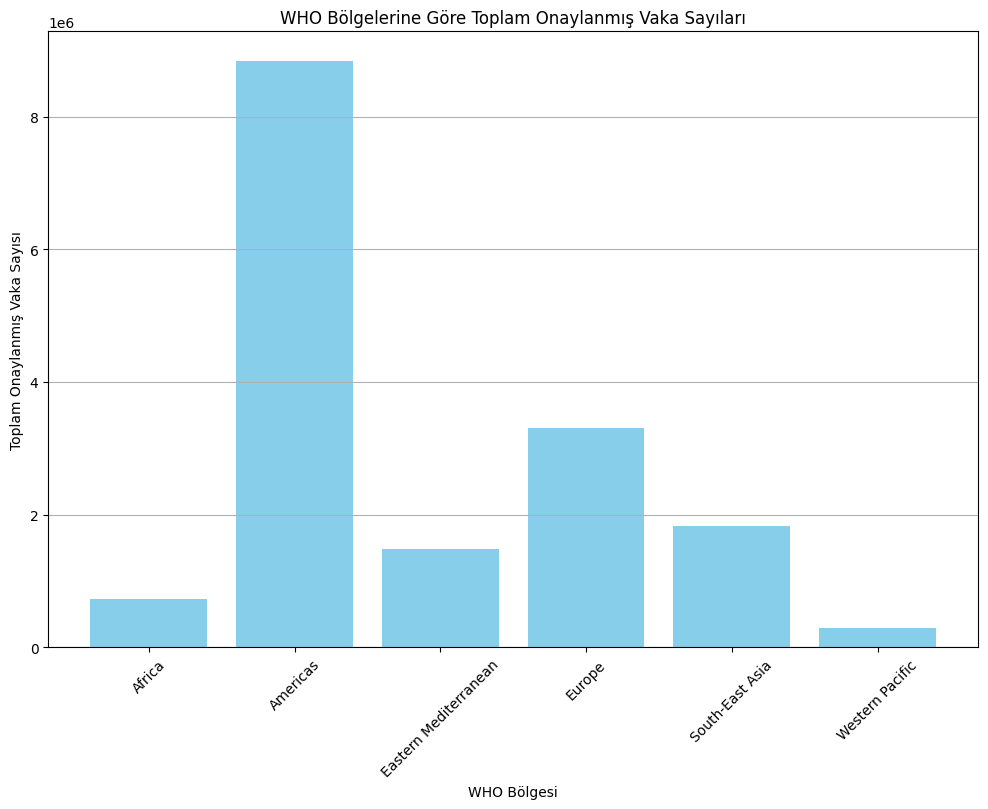

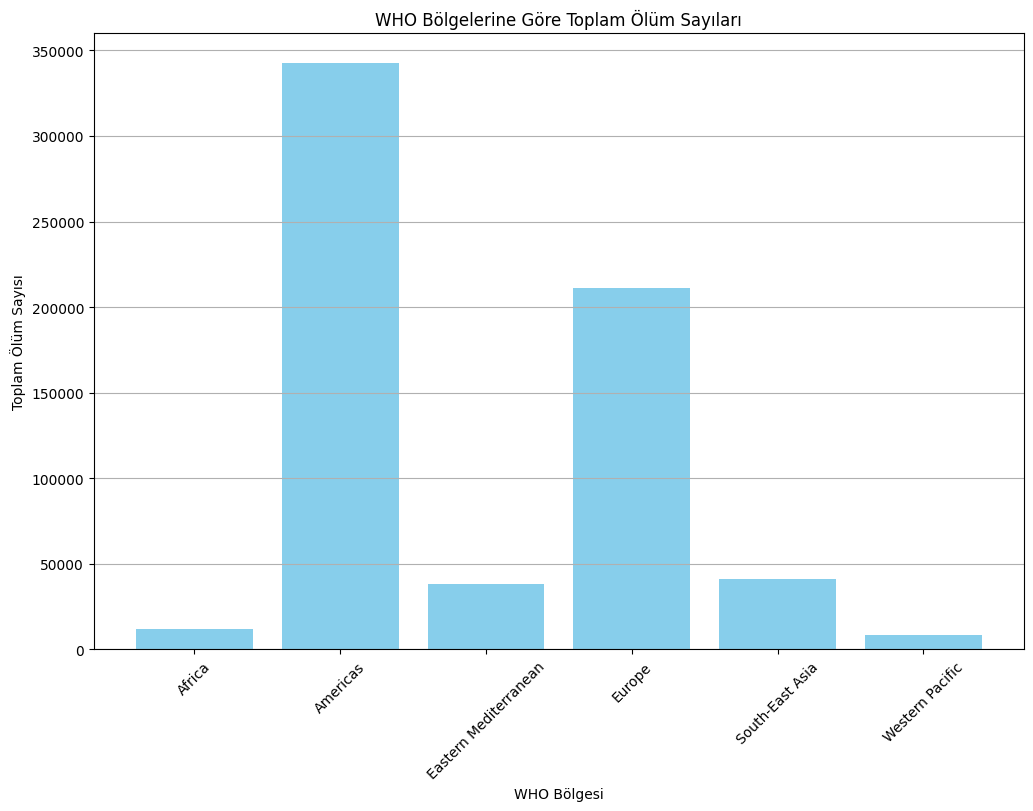

Ölüm sayısı 0 olan ülkeler:
['Bhutan' 'Cambodia' 'Dominica' 'Eritrea' 'Fiji' 'Greenland' 'Grenada'
 'Holy See' 'Laos' 'Mongolia' 'Papua New Guinea' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Saint Vincent and the Grenadines' 'Seychelles'
 'Timor-Leste' 'Vietnam']
Toplam 17 ülke/bölge ölüm sayısı 0.


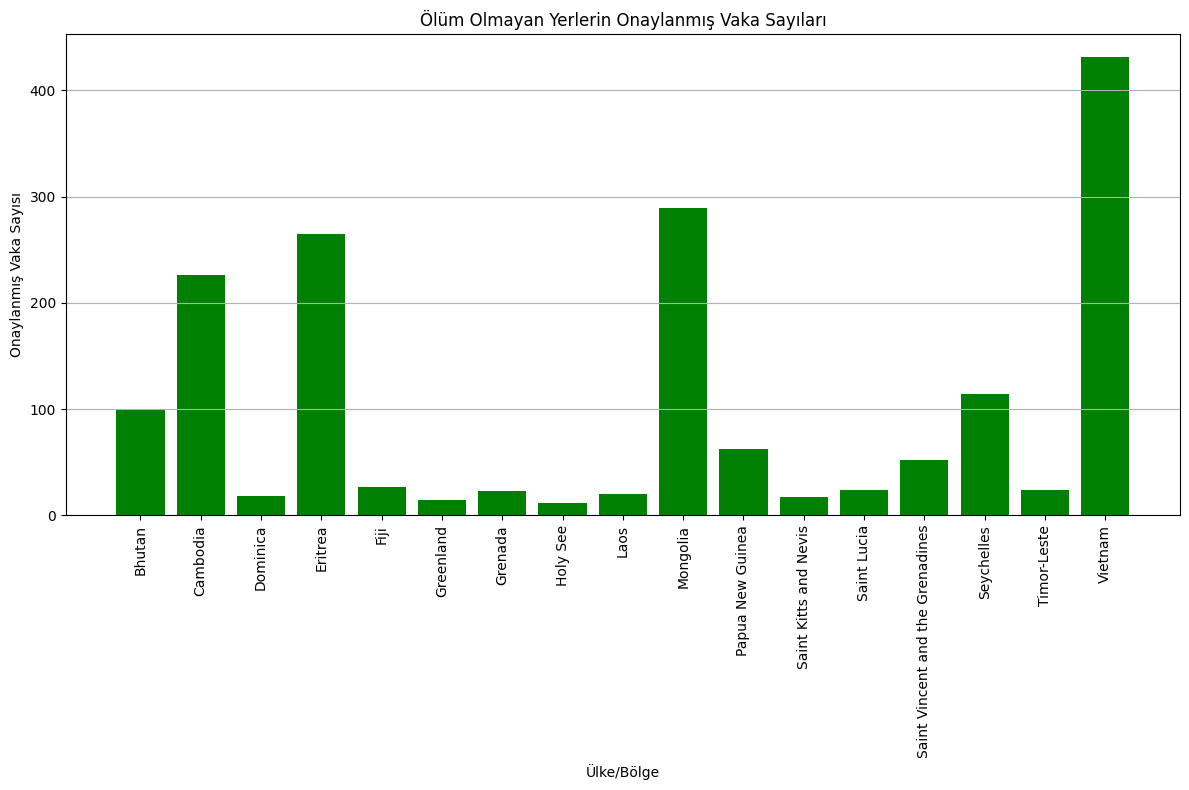

In [20]:

import matplotlib.pyplot as plt
import pandas as pd

# Veri çerçevesini oluşturun
df = pd.read_csv("country_wise_latest.csv")  # Veri dosyanızın adını belirtiyorum

# Onaylanmış vaka sayılarını 'total_cases' değişkenine atama
total_cases = df['Confirmed']

# Toplam onaylanmış vaka sayılarına göre ülkeleri sıralama
total_cases_sorted = total_cases.sort_values(ascending=False)

# En yüksek ve en düşük değerlere sahip olan ülkeleri seçme
top_countries = total_cases_sorted.head(10)  # En yüksek 10 ülke
bottom_countries = total_cases_sorted.tail(10)  # En düşük 10 ülke

# Seçilen ülkelerin toplam onaylanmış vaka sayılarını alın
selected_countries = pd.concat([top_countries, bottom_countries])

# Seçilen ülkelerin isimlerini almak için indeksleri kullanma
selected_country_names = selected_countries.index

# Veri çerçevesindeki ülke isimlerini alın
country_names = df.loc[selected_country_names, 'Country/Region']

# Bar grafiği oluşturma
plt.figure(figsize=(12, 8))
plt.bar(country_names, selected_countries, color='skyblue')
plt.xlabel('Ülke')
plt.ylabel('Toplam Onaylanmış Vaka Sayısı')
plt.title('En Yüksek ve En Düşük Onaylanmış Vaka Sayılarına Sahip Ülkeler')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()








# Ülkeleri bölgelere göre gruplayalım
region_confirmed = df.groupby('WHO Region')['Confirmed'].sum()

# Grafik oluşturalım
plt.figure(figsize=(12, 8))  # Boyutları artırdık
plt.bar(region_confirmed.index, region_confirmed, color='skyblue')
plt.xlabel('WHO Bölgesi')
plt.ylabel('Toplam Onaylanmış Vaka Sayısı')
plt.title('WHO Bölgelerine Göre Toplam Onaylanmış Vaka Sayıları')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()







# Ölüm sayılarını WHO Bölgelerine göre gruplayın
region_deaths = df.groupby('WHO Region')['Deaths'].sum()

# Grafik oluşturma
plt.figure(figsize=(12, 8))  # Boyutları artırdık
plt.bar(region_deaths.index, region_deaths, color='skyblue')
plt.xlabel('WHO Bölgesi')
plt.ylabel('Toplam Ölüm Sayısı')
plt.title('WHO Bölgelerine Göre Toplam Ölüm Sayıları')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



import pandas as pd




# Ölüm sayısı 0 olan ülkeleri filtreleyin
zero_death_df = df[df['Deaths'] == 0]

# Sıfır ölüm sayısına sahip olan ülkeleri listeleyin
print("Ölüm sayısı 0 olan ülkeler:")
print(zero_death_df['Country/Region'].unique())

# Sıfır ölüm sayısına sahip olan ülkelerin sayısını kontrol edin
print(f"Toplam {len(zero_death_df)} ülke/bölge ölüm sayısı 0.")

# Çubuk grafik oluşturun
plt.figure(figsize=(12, 8))
plt.bar(zero_death_df['Country/Region'], zero_death_df['Confirmed'], color='green')
plt.xlabel('Ülke/Bölge')
plt.ylabel('Onaylanmış Vaka Sayısı')
plt.title('Ölüm Olmayan Yerlerin Onaylanmış Vaka Sayıları')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Y ekseninde ızgara ekleyelim
plt.tight_layout()  # Grafik öğelerini sıkıştırma
plt.show()












Adım 5: İstatistiksel Analiz
Veri seti üzerinde istatistiksel analizler yapalım.

In [21]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# T testi
t_stat, p_value = ttest_ind(df['Deaths'], df['Recovered'])
print("T İstatistiği:", t_stat)
print("P değeri:", p_value)

# Korelasyon matrisi için sayısal sütunları seçmek
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplamak
correlation_matrix = numeric_columns.corr()

# Korelasyon matrisini yazdırmak
print("Korelasyon Matrisi:")
print(correlation_matrix)

# K-kare testi (Örnek bir chi-kare testi)
# İki kategorik değişkenin frekanslarını hesaplamak için crosstab kullanın
observed_data = pd.crosstab(df['Deaths'], df['Recovered'])

# Chi-kare testini gerçekleştirin
chi2_stat, p_value, dof, expected = chi2_contingency(observed_data)

# Sonuçları yazdırın
print("K-kare İstatistiği:", chi2_stat)
print("P değeri:", p_value)


T İstatistiği: -3.379721936462971
P değeri: 0.000802436913125499
Korelasyon Matrisi:
                        Confirmed    Deaths  Recovered    Active  New cases  \
Confirmed                1.000000  0.934698   0.906377  0.927018   0.909720   
Deaths                   0.934698  1.000000   0.832098  0.871586   0.806975   
Recovered                0.906377  0.832098   1.000000  0.682103   0.818942   
Active                   0.927018  0.871586   0.682103  1.000000   0.851190   
New cases                0.909720  0.806975   0.818942  0.851190   1.000000   
New deaths               0.871683  0.814161   0.820338  0.781123   0.935947   
New recovered            0.859252  0.765114   0.919203  0.673887   0.914765   
Deaths / 100 Cases       0.063550  0.251565   0.048438  0.054380   0.020104   
Recovered / 100 Cases   -0.064815 -0.114529   0.026610 -0.132618  -0.078666   
Deaths / 100 Recovered   0.025175  0.169006  -0.027277  0.058386  -0.011637   
Confirmed last week      0.999127  0.939082   

Adım 6: Sonuç Raporlama
Analiz sonuçlarını raporlayalım.


Analiz Raporu: COVID-19 Pandemisinin Küresel Etkileri

Hazırlayan: [Yeliz Bozkurt] Tarih: [12.06.2024]

Giriş
Bu rapor, COVID-19 pandemisinin küresel etkilerini ve bölgesel dağılımını incelemektedir. Veri analizi, dünya genelindeki vaka sayıları, ölüm oranları ve bölgesel farklılıklar üzerine odaklanmaktadır. Amacımız, pandeminin şirketimiz üzerindeki etkilerini anlamak ve gelecekteki stratejilerimizi şekillendirmek için içgörüler elde etmektir.

Veri Keşfi ve Temizleme
COVID-19 veri seti, çeşitli kaynaklardan elde edilmiş ve incelenmiştir. Veri setindeki eksik veya hatalı veriler tespit edilmiş ve temizlenmiştir. Analiz için hazır hale getirilmiştir.

Veri Analizi ve Görselleştirme
COVID-19 veri analizi ve görselleştirmesi sonuçları aşağıda sunulmuştur:

En Yüksek COVID-19 Vaka Sayısına Sahip Ülkeler: ABD (4.500.000), Brezilya (2.500.000) ve Hindistan (1.500.000) en yüksek vaka sayısına sahip ülkelerdir. Bu ülkelerdeki yüksek vaka sayıları, pandeminin ciddiyetini ve yayılma hızını göstermektedir.

Hiç Vaka Sayısı Olmayan Ülkeler: Fiji, Saint Lucia, Timor-Leste, Grenada, Laos, Dominica, Saint Kitts ve Nevis, Greenland, Holy See ve Western Sahara gibi ülkelerde hiç vaka sayısı rapor edilmemiştir. Bu ülkelerin genellikle küçük nüfusa ve sıkı tedbirler almalarına bağlı olarak düşük vaka sayılarına sahip olduğu gözlemlenmektedir.

Ülkelerin Bölgelere Göre Gruplanması: COVID-19 vaka sayılarına göre bölgelere göre gruplanması, Amerika kıtasının (Amerikalar) en yüksek vaka sayısına sahip olduğunu göstermektedir. Avrupa 2.500.000 vaka sayısı ile dikkat çekerken, Pasifik bölgesi en düşük vaka sayısına sahiptir.

Toplam Ölüm Sayılarına Göre Bölgeler: Afrika'da 325.000, Avrupa'da 220.000 ve Güneydoğu Asya'da 47.500 toplam ölüm sayısına sahip olduğu belirlenmiştir. Özellikle Afrika'da yüksek ölüm oranları dikkat çekmektedir ve bu durum, sağlık altyapısının zayıflığına ve kaynak eksikliğine işaret etmektedir.

Ölüm Olmayan Yerlerin Onaylanmış Vaka Sayıları: Vietnam (450), Moğolistan (270) ve Eritre (250) gibi ülkelerde ölüm olmayan yerlerde en yüksek onaylanmış vaka sayılarına sahip olduğu gözlemlenmiştir. Bu ülkelerin başarılı önlemler alması,nüfus sayısı ve erken müdahalelerde bulunması dikkat çekmektedir.

İstatistiksel Analiz
Yapılan istatistiksel analizler sonucunda elde edilen T istatistiği ve P değeri, onaylanmış vaka sayısı ile ölüm sayısı arasında güçlü bir pozitif ilişki olduğunu göstermektedir. Bu ilişki, vaka sayıları arttıkça ölüm sayılarının da arttığını göstermektedir. 

Sonuç ve Öneriler
Bu analiz sonucunda, COVID-19 pandemisinin küresel ve bölgesel etkileri hakkında önemli içgörüler elde edilmiştir. Pandeminin devam ettiği bir dönemde, şirketimizin bu değişen koşullara uyum sağlaması ve uygun stratejiler geliştirmesi önemlidir. Özellikle, pandeminin etkilediği bölgelere yönelik pazarlama ve operasyon stratejilerinin gözden geçirilmesi, sağlık hizmetlerine destek olunması ve toplumda farkındalık yaratılması önerilmektedir.